# Аналитический кейс: факторы, влияющие на доход пользователей

## Цель
Проверить, какие факторы оказывают влияние на доход пользователей, 
и оценить устойчивость полученных выводов.

## Гипотезы
- Уровень образования влияет на доход
- Семейное положение связано с доходом
- Опыт работы влияет на доход
- Продолжительность рабочего дня связана с доходом

In [2]:
import numpy as np
import pandas as pd

df_raw = pd.read_stata(r"C:\Users\Asus\Downloads\r33i_os_84_DTA\r33i_os_84.dta", convert_categoricals=False)
clean_columns = df_raw.columns.str.strip().str.lower().str.replace('.', '_', regex=False)
df_raw.columns = clean_columns

variable_map = {
    'wage': 'ccj10',
    'education': 'cc_educ',
    'age': 'cc_age',
    'family': 'cc_marst',
    'children': 'ccj72_172',
    'work_hours': 'ccj6_1a',
    'gender': 'cch5',
    'region': 'region',
    'year': 'cc_int_y',
    'exp': 'ccj161_3y'
}

my_vars_raw = list(variable_map.values())
df = df_raw[my_vars_raw].copy()

rename_map = {v: k for k, v in variable_map.items()}
df.rename(columns=rename_map, inplace=True)

print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wage        5245 non-null   float64
 1   education   10303 non-null  float64
 2   age         12000 non-null  float64
 3   family      10303 non-null  float64
 4   children    7445 non-null   float64
 5   work_hours  5387 non-null   float64
 6   gender      12000 non-null  float64
 7   region      12000 non-null  float64
 8   year        12000 non-null  float64
 9   exp         9107 non-null   float64
dtypes: float64(10)
memory usage: 937.6 KB
None


,wage,education,age,family,children,work_hours,gender,region,year,exp
0,NaN,16.0,66.0,2.0,3.0,NaN,2.0,1.0,2025.0,41.0
1,NaN,16.0,71.5,5.0,3.0,NaN,2.0,1.0,2025.0,40.0
2,NaN,14.0,62.5,5.0,2.0,NaN,2.0,1.0,2025.0,29.0
3,22000.0,14.0,61.0,2.0,3.0,12.0,2.0,1.0,2024.0,42.0
4,50000.0,16.0,55.5,2.0,3.0,12.0,1.0,1.0,2024.0,35.0
...,...,...,...,...,...,...,...,...,...,...
11995,NaN,21.0,74.5,2.0,NaN,NaN,2.0,77.0,2024.0,99999999.0
11996,19800.0,18.0,37.5,2.0,2.0,8.0,2.0,77.0,2024.0,10.0
11997,24000.0,21.0,41.5,4.0,2.0,8.0,2.0,77.0,2024.0,14.0
11998,NaN,NaN,7.0,NaN,NaN,NaN,2.0,77.0,2024.0,NaN


In [3]:
df = df[(df['gender'] == 1) & (df['region'] == 161) & (df['year'] == 2024.0)]

In [4]:
df = df[df['age'].between(18, 55)]
df = df.dropna()
df['exp2'] = df['exp']**2
df['is_children'] = (df['children'] > 0).astype(int)
educ_recode_map = {
    1: 0, 
    2: 0,
    3: 0, 
    4: 0, 
    5: 0, 
    6: 0, 
    7: 0, 
    8: 0, 
    9: 0,
    10: 1, 
    11: 1,
    12: 0, 
    13: 1, 
    14: 1, 
    15: 1, 
    16: 1, 
    17: 1, 
    18: 1,
    19: 2, 
    20: 2, 
    21: 2, 
    22: 2, 
    23: 2
}

family_recode_map = { 
    2: 1,
    3: 1, 
    4: 0
}

df['wage'] = df['wage'].astype('Int64')
df['family'] = df['family'].astype('Int64')

df['educ'] = df['education'].map(educ_recode_map)
df['marriage'] = df['family'].map(family_recode_map)

MISSING_CODE = 99999996
df['work_hours'] = df['work_hours'].replace(MISSING_CODE, np.nan) 
mean_hours = df['work_hours'].mean()
df['work_hours'] = df['work_hours'].fillna(mean_hours)
df['work_hours'] = df['work_hours'].round(2)

df.drop(columns=['children'], inplace=True)
df.drop(columns=['education'], inplace=True)
df.drop(columns=['gender'], inplace=True)
df.drop(columns=['region'], inplace=True)
df.drop(columns=['year'], inplace=True)
df.drop(columns=['family'], inplace=True)

In [5]:
df

,wage,age,work_hours,exp,exp2,is_children,educ,marriage
1704,90000,53.5,5.00,29.0,841.0,1,2,1
1714,220000,47.5,8.33,4.0,16.0,1,1,1
1717,30000,46.5,8.00,22.0,484.0,1,2,1
1719,83000,36.5,12.00,15.0,225.0,1,2,1
2771,70000,45.0,8.00,24.0,576.0,1,2,1
2775,80000,33.5,8.00,12.0,144.0,1,1,1
4391,50000,50.5,8.00,25.0,625.0,1,1,1
4395,49800,54.5,8.33,29.0,841.0,1,2,1
5101,70000,42.5,10.00,18.0,324.0,1,1,1
5110,43800,53.0,8.00,29.0,841.0,1,1,1


In [6]:
df.to_excel('data_metrics.xlsx', index=False)

In [7]:
df.describe()

,wage,age,work_hours,exp,exp2,is_children,educ,marriage
count,21.0,21.000000,21.000000,21.000000,21.000000,21.0,21.000000,21.000000
mean,68671.428571,43.142857,8.332857,19.095238,420.714286,1.0,1.428571,0.952381
std,39718.674989,7.120644,1.264912,7.674013,288.859506,0.0,0.507093,0.218218
min,25000.0,32.000000,5.000000,4.000000,16.000000,1.0,1.000000,0.000000
25%,45000.0,37.000000,8.000000,13.000000,169.000000,1.0,1.000000,1.000000
50%,70000.0,42.500000,8.000000,19.000000,361.000000,1.0,1.000000,1.000000
75%,80000.0,47.500000,8.330000,25.000000,625.000000,1.0,2.000000,1.000000
max,220000.0,54.500000,12.000000,31.000000,961.000000,1.0,2.000000,1.000000


In [8]:
R_wage = 220000 - 25000
R_age = 54.5 - 32
R_work_hours = 12 - 5
R_exp = 31 - 4
R_exp2 = 961 - 16
R_is_children = 1 - 1
R_educ = 2 - 1
R_marriage = 1 - 0
print(f"Размах для зарплаты: {R_wage}, для возраста: {R_age}, для количества рабочих часов в день: {R_work_hours}, размах для количества лет опыта: {R_exp}")

Размах для зарплаты: 195000, для возраста: 22.5, для количества рабочих часов в день: 7, размах для количества лет опыта: 27


In [9]:
iqr_wage = 80000 - 45000
iqr_age = 47.5 - 37
iqr_work_hours = 8.33 - 8
iqr_exp = 25 - 13
iqr_exp2 = 625 - 169
print(f"Межквартильный размах для зарплаты: {iqr_wage}, для возраста: {iqr_age}, для количества рабочих часов в день: {round(iqr_work_hours, 2)}, межквартильный размах для количества лет опыта: {iqr_exp}")

Межквартильный размах для зарплаты: 35000, для возраста: 10.5, для количества рабочих часов в день: 0.33, межквартильный размах для количества лет опыта: 12


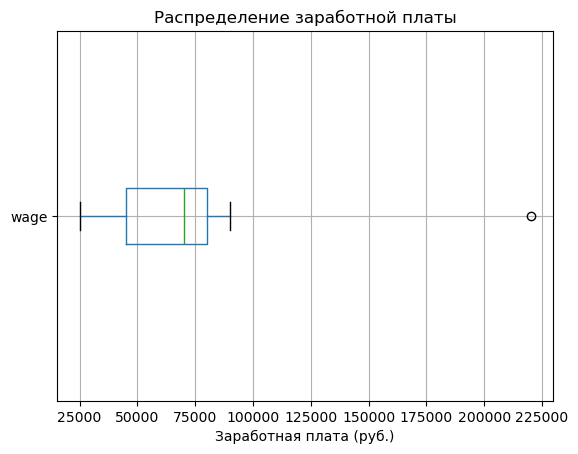

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

df.boxplot(column='wage', vert=False)
plt.title('Распределение заработной платы')
plt.xlabel('Заработная плата (руб.)')
plt.savefig('Boxplot_Wage_Distribution.png') 
plt.show()

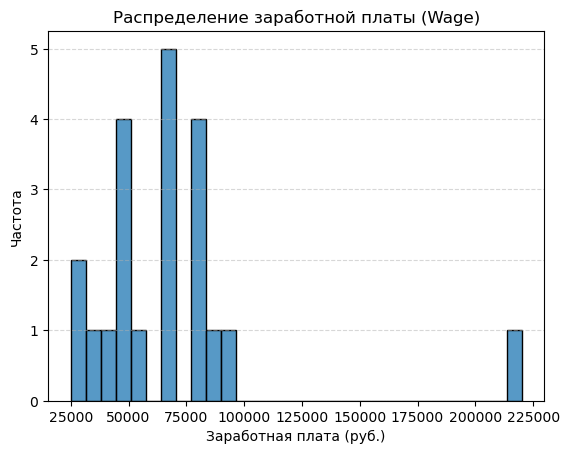

In [11]:
import seaborn as sns

sns.histplot(df['wage'], bins=30,)
plt.title('Распределение заработной платы (Wage)')
plt.xlabel('Заработная плата (руб.)')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.savefig('Histogram_Wage.png')
plt.show()

In [12]:
skewness_wage = round(df['wage'].skew(), 2)
kurtosis_wage = round(df['wage'].kurt(), 2)
print(f"Коэффициент ассиметрии для wage: {skewness_wage}, а коэффициент эксцесса: {kurtosis_wage}")

Коэффициент ассиметрии для wage: 2.86, а коэффициент эксцесса: 10.97


In [13]:
skewness_age = round(df['age'].skew(), 2)
kurtosis_age = round(df['age'].kurt(), 2)
print(f"Коэффициент ассиметрии для age: {skewness_age}, а коэффициент эксцесса: {kurtosis_age}")

Коэффициент ассиметрии для age: 0.09, а коэффициент эксцесса: -1.22


In [14]:
df.corr()

,wage,age,work_hours,exp,exp2,is_children,educ,marriage
wage,1.000000,-0.015348,-0.004159,-0.494443,-0.388660,NaN,-0.051246,0.251931
age,-0.015348,1.000000,-0.403762,0.772926,0.848691,NaN,-0.073193,0.085042
work_hours,-0.004159,-0.403762,1.000000,-0.295333,-0.363008,NaN,-0.129844,0.060294
exp,-0.494443,0.772926,-0.295333,1.000000,0.980113,NaN,0.091777,0.181990
exp2,-0.388660,0.848691,-0.363008,0.980113,1.000000,NaN,0.063003,0.199664
is_children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
educ,-0.051246,-0.073193,-0.129844,0.091777,0.063003,NaN,1.000000,0.193649
marriage,0.251931,0.085042,0.060294,0.181990,0.199664,NaN,0.193649,1.000000


In [15]:
df['ln_wage'] = np.log(df['wage'])

In [16]:
df.drop(columns=['is_children'], inplace=True)

In [17]:
df

,wage,age,work_hours,exp,exp2,educ,marriage,ln_wage
1704,90000,53.5,5.00,29.0,841.0,2,1,11.407565
1714,220000,47.5,8.33,4.0,16.0,1,1,12.301383
1717,30000,46.5,8.00,22.0,484.0,2,1,10.308953
1719,83000,36.5,12.00,15.0,225.0,2,1,11.326596
2771,70000,45.0,8.00,24.0,576.0,2,1,11.156251
2775,80000,33.5,8.00,12.0,144.0,1,1,11.289782
4391,50000,50.5,8.00,25.0,625.0,1,1,10.819778
4395,49800,54.5,8.33,29.0,841.0,2,1,10.81577
5101,70000,42.5,10.00,18.0,324.0,1,1,11.156251
5110,43800,53.0,8.00,29.0,841.0,1,1,10.687389


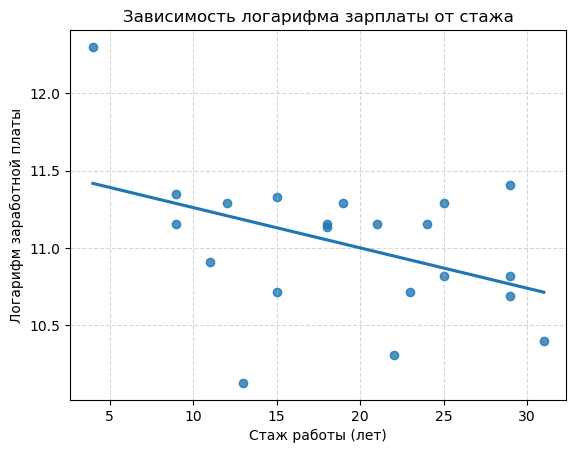

In [18]:
sns.regplot(
    x='exp', 
    y='ln_wage', 
    data=df,
    ci=None,
    scatter_kws={'alpha':0.8})

plt.title('Зависимость логарифма зарплаты от стажа')
plt.xlabel('Стаж работы (лет)')
plt.ylabel('Логарифм заработной платы')
plt.grid(axis='both', alpha=0.5, linestyle='--')
plt.savefig('ln_wage_vs_exp.png')
plt.show()

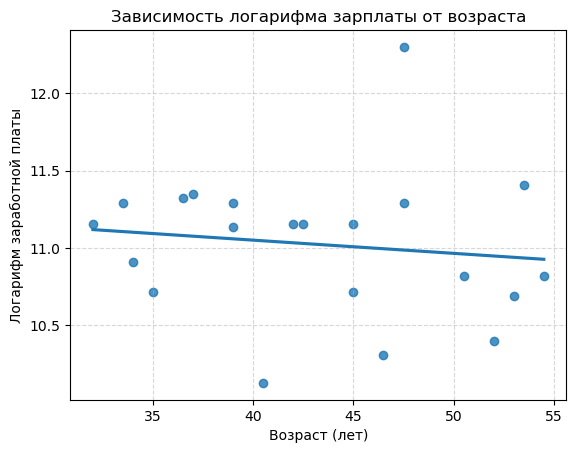

In [19]:
sns.regplot(
    x='age', 
    y='ln_wage', 
    data=df,
    ci=None,
    scatter_kws={'alpha':0.8})

plt.title('Зависимость логарифма зарплаты от возраста')
plt.xlabel('Возраст (лет)')
plt.ylabel('Логарифм заработной платы')
plt.grid(axis='both', alpha=0.5, linestyle='--')
plt.savefig('ln_wage_vs_age.png')
plt.show()

In [20]:
import statsmodels.formula.api as smf

formula = 'ln_wage ~ age + work_hours + exp + exp2 + C(educ) + C(marriage)'
model = smf.ols(formula, data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                ln_wage   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     3.611
Date:                Thu, 26 Feb 2026   Prob (F-statistic):             0.0224
Time:                        18:55:02   Log-Likelihood:                -3.5321
No. Observations:                  21   AIC:                             21.06
Df Residuals:                      14   BIC:                             28.38
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.1969      1.463  

In [21]:
hypothesis = 'work_hours = exp'

f_test_result = model.f_test(hypothesis)

print(f"Результаты F-теста для гипотезы: {hypothesis}")
print(f_test_result)

Результаты F-теста для гипотезы: work_hours = exp
<F test: F=0.0020866824344392965, p=0.9642103260796882, df_denom=14, df_num=1>


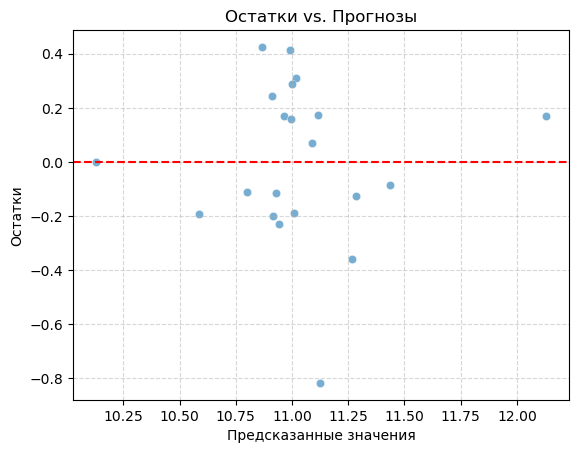

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

df['residuals'] = model.resid
df['fitted'] = model.fittedvalues

sns.scatterplot(
    x='fitted', 
    y='residuals', 
    data=df, 
    alpha=0.6)

plt.axhline(0, color='red', linestyle='--')
plt.title('Остатки vs. Прогнозы')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.grid(axis='both', alpha=0.5, linestyle='--')
plt.savefig('residuals_vs_fitted_plot.png')
plt.show()

In [23]:
formula_reduced = 'ln_wage ~ C(marriage)'
model_reduced = smf.ols(formula_reduced, data=df).fit()

print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:                ln_wage   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     4.538
Date:                Thu, 26 Feb 2026   Prob (F-statistic):             0.0464
Time:                        18:55:02   Log-Likelihood:                -11.102
No. Observations:                  21   AIC:                             26.20
Df Residuals:                      19   BIC:                             28.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           10.1266      0.432  

In [24]:
formula_lin = 'wage ~ age + work_hours + exp + exp2 + C(educ) + C(marriage)'
model_lin = smf.ols(formula_lin, data=df).fit()

print(model_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     6.779
Date:                Thu, 26 Feb 2026   Prob (F-statistic):            0.00157
Time:                        18:55:03   Log-Likelihood:                -237.36
No. Observations:                  21   AIC:                             488.7
Df Residuals:                      14   BIC:                             496.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.088e+05      1e+05  

In [25]:
df['ln_age'] = np.log(df['age'])
df['ln_work_hours'] = np.log(df['work_hours'])
df['ln_exp'] = np.log(df['exp'])

formula_log_log = 'ln_wage ~ ln_age + ln_work_hours + ln_exp + exp2 + C(educ) + C(marriage)'
model_log_log = smf.ols(formula_log_log, data=df).fit()

print(model_log_log.summary())

                            OLS Regression Results                            
Dep. Variable:                ln_wage   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     4.014
Date:                Thu, 26 Feb 2026   Prob (F-statistic):             0.0151
Time:                        18:55:03   Log-Likelihood:                -2.8429
No. Observations:                  21   AIC:                             19.69
Df Residuals:                      14   BIC:                             27.00
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.5605      4.836  

In [26]:
df

,wage,age,work_hours,exp,exp2,educ,marriage,ln_wage,residuals,fitted,ln_age,ln_work_hours,ln_exp
1704,90000,53.5,5.00,29.0,841.0,2,1,11.407565,4.157952e-01,10.991770,3.979682,1.609438,3.367296
1714,220000,47.5,8.33,4.0,16.0,1,1,12.301383,1.699992e-01,12.131384,3.860730,2.119863,1.386294
1717,30000,46.5,8.00,22.0,484.0,2,1,10.308953,-8.174302e-01,11.126383,3.839452,2.079442,3.091042
1719,83000,36.5,12.00,15.0,225.0,2,1,11.326596,3.090848e-01,11.017511,3.597312,2.484907,2.708050
2771,70000,45.0,8.00,24.0,576.0,2,1,11.156251,2.443131e-01,10.911937,3.806662,2.079442,3.178054
2775,80000,33.5,8.00,12.0,144.0,1,1,11.289782,1.732839e-01,11.116498,3.511545,2.079442,2.484907
4391,50000,50.5,8.00,25.0,625.0,1,1,10.819778,-1.892142e-01,11.008992,3.921973,2.079442,3.218876
4395,49800,54.5,8.33,29.0,841.0,2,1,10.81577,-1.132549e-01,10.929025,3.998201,2.119863,3.367296
5101,70000,42.5,10.00,18.0,324.0,1,1,11.156251,6.922060e-02,11.087030,3.749504,2.302585,2.890372
5110,43800,53.0,8.00,29.0,841.0,1,1,10.687389,-1.129751e-01,10.800364,3.970292,2.079442,3.367296


In [27]:
df['high_educ'] = (df['educ'] == 2).astype(int)

formula_chow = 'ln_wage ~ (age + work_hours + exp + exp2 + C(marriage)) * C(high_educ)'
model_chow = smf.ols(formula_chow, data=df).fit()

hypotheses = [name for name in model_chow.params.index if ':' in name or 'high_educ' in name]
print(model_chow.f_test(hypotheses))

<F test: F=3.795847571607392, p=0.03457395742899083, df_denom=10, df_num=5>


C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '


In [28]:
from scipy import stats
formula_base = 'ln_wage ~ age + work_hours + exp + exp2 + C(marriage)'

model_pooled = smf.ols(formula_base, data=df).fit()
rss_pooled = model_pooled.ssr
k = len(model_pooled.params)   
N = len(df)

group1 = df[df['high_educ'] == 0]
group2 = df[df['high_educ'] == 1]

n1 = len(group1)
n2 = len(group2)

print(f"Наблюдений в группе 0: {n1}, Наблюдений в группе 1: {n2}, Параметров модели (k): {k}")

model_g1 = smf.ols(formula_base, data=group1).fit()
model_g2 = smf.ols(formula_base, data=group2).fit()
    
rss1 = model_g1.ssr
rss2 = model_g2.ssr

numerator = (rss_pooled - (rss1 + rss2)) / k
denominator = (rss1 + rss2) / (N - 2 * k)
    
f_stat_chow = numerator / denominator

df1_chow = k
df2_chow = N - 2 * k
    
p_value_chow = 1 - stats.f.cdf(f_stat_chow, df1_chow, df2_chow)
    
print(f"\nКлассический тест Чоу:")
print(f"F-statistic: {f_stat_chow:.4f}")
print(f"p-value: {p_value_chow:.4f}")
print(f"df1: {df1_chow}, df2: {df2_chow}")

Наблюдений в группе 0: 12, Наблюдений в группе 1: 9, Параметров модели (k): 6

Классический тест Чоу:
F-statistic: 2.8469
p-value: 0.0771
df1: 6, df2: 9


In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = df[['age', 'work_hours', 'exp', 'exp2', 'educ', 'marriage']].copy()
X_vif['Intercept'] = 1 

vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)

     Variable         VIF
0         age    5.675431
1  work_hours    1.399658
2         exp   42.984609
3        exp2   63.190449
4        educ    1.148018
5    marriage    1.199004
6   Intercept  381.635597


In [30]:
df.drop(columns=['exp2'], inplace=True)

In [31]:
df

,wage,age,work_hours,exp,educ,marriage,ln_wage,residuals,fitted,ln_age,ln_work_hours,ln_exp,high_educ
1704,90000,53.5,5.00,29.0,2,1,11.407565,4.157952e-01,10.991770,3.979682,1.609438,3.367296,1
1714,220000,47.5,8.33,4.0,1,1,12.301383,1.699992e-01,12.131384,3.860730,2.119863,1.386294,0
1717,30000,46.5,8.00,22.0,2,1,10.308953,-8.174302e-01,11.126383,3.839452,2.079442,3.091042,1
1719,83000,36.5,12.00,15.0,2,1,11.326596,3.090848e-01,11.017511,3.597312,2.484907,2.708050,1
2771,70000,45.0,8.00,24.0,2,1,11.156251,2.443131e-01,10.911937,3.806662,2.079442,3.178054,1
2775,80000,33.5,8.00,12.0,1,1,11.289782,1.732839e-01,11.116498,3.511545,2.079442,2.484907,0
4391,50000,50.5,8.00,25.0,1,1,10.819778,-1.892142e-01,11.008992,3.921973,2.079442,3.218876,0
4395,49800,54.5,8.33,29.0,2,1,10.81577,-1.132549e-01,10.929025,3.998201,2.119863,3.367296,1
5101,70000,42.5,10.00,18.0,1,1,11.156251,6.922060e-02,11.087030,3.749504,2.302585,2.890372,0
5110,43800,53.0,8.00,29.0,1,1,10.687389,-1.129751e-01,10.800364,3.970292,2.079442,3.367296,0


In [32]:
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

bp_test = het_breuschpagan(model.resid, model.model.exog)
print("Тест Бройша-Пагана:")
print(f"LM-stat: {bp_test[0]:.4f}, p-value: {bp_test[1]:.4f}")

white_test = het_white(model.resid, model.model.exog)
print("\nТест Уайта:")
print(f"LM-stat: {white_test[0]:.4f}, p-value: {white_test[1]:.4f}")

Тест Бройша-Пагана:
LM-stat: 5.8730, p-value: 0.4376

Тест Уайта:
LM-stat: 20.0566, p-value: 0.3912


In [33]:
formula_interact = 'ln_wage ~ age + work_hours + exp + C(educ) + C(marriage) + C(educ):C(marriage)'
model_interact = smf.ols(formula_interact, data=df).fit()

print(model_interact.summary())

                            OLS Regression Results                            
Dep. Variable:                ln_wage   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     4.570
Date:                Thu, 26 Feb 2026   Prob (F-statistic):            0.00987
Time:                        18:55:03   Log-Likelihood:                -3.6319
No. Observations:                  21   AIC:                             19.26
Df Residuals:                      15   BIC:                             25.53
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [34]:
formula_final = 'ln_wage ~ age + work_hours + exp + C(educ) + C(marriage)'
model_final = smf.ols(formula_final, data=df).fit()

print(model_final.summary())

                            OLS Regression Results                            
Dep. Variable:                ln_wage   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     4.570
Date:                Thu, 26 Feb 2026   Prob (F-statistic):            0.00987
Time:                        18:55:03   Log-Likelihood:                -3.6319
No. Observations:                  21   AIC:                             19.26
Df Residuals:                      15   BIC:                             25.53
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.5749      1.005  

## Выводы и ограничения

- На данной выборке статистически значимым оказался фактор семейного положения
- Большинство гипотез не подтвердилось из-за малого объема данных
- Небольшая выборка и мультиколлинеарность ограничивают интерпретацию результатов

## Что можно улучшить
- Увеличить объем выборки
- Добавить дополнительные поведенческие признаки
- Проверить устойчивость результатов на других данных